In [214]:
import pandas as pd
import numpy as np
import pathlib

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.layers import Input, Dense, Activation, TextVectorization, Embedding, GRU,Bidirectional
from keras.models import Model
import tensorflow as tf

In [215]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
df = pd.read_csv(DATA_DIR/"generic_sentiment_dataset_50k.csv")

In [216]:
df = df[df.sentiment != "neutral"]

In [217]:
df

,sentiment,text,label
0,positive,good mobile. battery is 5000 mah is very big. ...,2
1,positive,Overall in hand ecpirience is quite good matt ...,2
2,positive,"1. Superb Camera,\n2. No lag\n3. This is my fi...",2
3,positive,Bigger size of application names doesn't allow...,2
4,negative,Just a hype of stock android which is not flaw...,0
...,...,...,...
49994,positive,This place is heavenly!!! I have dreams about ...,2
49995,positive,good display..good battery...awsm perfomace..i...,2
49996,negative,bad phone,0
49998,negative,Bakbass phone ever. Camera quality just 2 mp c...,0


# Utilizando GRU Bidirecional com Keras

In [218]:
#==========Dataset da jigisaw==========#

# Classificando todos os comentarios com 1 na coluna toxicity
# dataset["toxicity"] = dataset["toxic"] | dataset["severe_toxic"] | dataset["obscene"] | dataset["threat"] | dataset["insult"]

# Como modelo estava demorando muito para ficar pronto, decidi diminuir um sample com 50% do total
# new_size = int(len(dataset) / 2)
# dataset = dataset.sample(new_size)

# ohe = OneHotEncoder()
# y_ohe = ohe.fit_transform(dataset["toxicity"].to_numpy().reshape((-1,1))).todense()

# X_train, X_test, y_train, y_test = train_test_split(dataset["comment_text"], y_ohe)

# Encontrando valor para colocar no parametro output_sequence_length do TextVectorizer
# dataset["words"] = dataset["comment_text"].str.split()
# dataset["n_words"] = dataset["words"].apply(len)
# mean_words = int(dataset["n_words"].mean())
# print(f"mean word size : {mean_words}")

#==========Dataset general analisys==========#

ohe = OneHotEncoder()
y_ohe = ohe.fit_transform(df["sentiment"].to_numpy().reshape((-1,1))).todense()

X_train, X_test, y_train, y_test = train_test_split(df["text"], y_ohe)

# Encontrando valor para colocar no parametro output_sequence_length do TextVectorizer
df["words"] = df["text"].str.split()
df["n_words"] = df["words"].apply(len)
mean_words = int(df["n_words"].mean())
print(f"mean word size : {mean_words}")

mean word size : 27


In [219]:
vocab_size = 10000
def bgru_softmax_model(vectorize_layer, vocab_size=vocab_size):
    input_layer = Input(shape=(1,), dtype=tf.string)
    x = input_layer
    x = vectorize_layer(x)
    x = Embedding(vocab_size, 2, name='projecao')(x)
    x = Bidirectional(GRU(1))(x)
    x = Dense(2, name='classificador')(x)
    x = Activation('softmax')(x)
    return Model(input_layer, x)


vectorize_layer = TextVectorization(output_mode='int',max_tokens=vocab_size, pad_to_max_tokens=True, output_sequence_length=mean_words)
vectorize_layer.adapt(X_train)
clf = bgru_softmax_model(vectorize_layer)
print(clf.summary())
clf.compile(loss="categorical_crossentropy",metrics=["accuracy"])
history = clf.fit(X_train,y_train,epochs=20,verbose=1,validation_split=0.1)
clf.evaluate(X_test, y_test)

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_22 (Text  (None, 27)               0         
 Vectorization)                                                  
                                                                 
 projecao (Embedding)        (None, 27, 2)             20000     
                                                                 
 bidirectional_5 (Bidirectio  (None, 2)                30        
 nal)                                                            
                                                                 
 classificador (Dense)       (None, 2)                 6         
                                                                 
 activation_16 (Activation)  (None, 2)                 0  

2023-04-26 01:13:50.612886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 01:13:50.613784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 01:13:50.614687: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

None
Epoch 1/20


2023-04-26 01:13:50.976821: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 01:13:50.978206: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 01:13:50.979213: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

849/851 [============================>.] - ETA: 0s - loss: 0.5754 - accuracy: 0.6872

2023-04-26 01:14:01.897114: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 01:14:01.898719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 01:14:01.899862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

851/851 [==============================] - 12s 11ms/step - loss: 0.5752 - accuracy: 0.6875 - val_loss: 0.4676 - val_accuracy: 0.7710
Epoch 2/20
851/851 [==============================] - 8s 9ms/step - loss: 0.3873 - accuracy: 0.8303 - val_loss: 0.3405 - val_accuracy: 0.8576
Epoch 3/20
851/851 [==============================] - 8s 9ms/step - loss: 0.3157 - accuracy: 0.8723 - val_loss: 0.3163 - val_accuracy: 0.8681
Epoch 4/20
851/851 [==============================] - 8s 10ms/step - loss: 0.2932 - accuracy: 0.8830 - val_loss: 0.3074 - val_accuracy: 0.8781
Epoch 5/20
851/851 [==============================] - 8s 9ms/step - loss: 0.2790 - accuracy: 0.8880 - val_loss: 0.3163 - val_accuracy: 0.8714
Epoch 6/20
851/851 [==============================] - 8s 9ms/step - loss: 0.2689 - accuracy: 0.8935 - val_loss: 0.3010 - val_accuracy: 0.8781
Epoch 7/20
851/851 [==============================] - 8s 9ms/step - loss: 0.2620 - accuracy: 0.8974 - val_loss: 0.2993 - val_accuracy: 0.8820
Epoch 8/20
851

[0.28241926431655884, 0.8865866661071777]

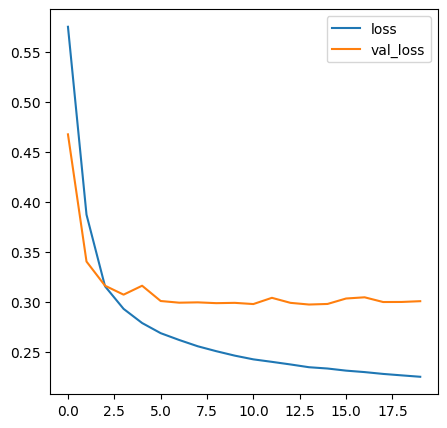

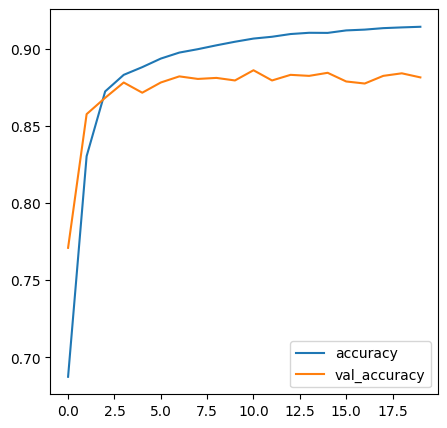

In [220]:
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.figure(figsize=(5,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [221]:
import plotly.express as px

# Visualização: onde foi parar cada palavra?
projecoes = clf.get_layer('projecao').get_weights()[0]
vocabulario = vectorize_layer.get_vocabulary()
y_pred_ohe = clf.predict(vocabulario)
y_pred = ohe.inverse_transform(y_pred_ohe)

df = pd.DataFrame()
df['dim_1'] = projecoes[:,0]
df['dim_2'] = projecoes[:,1]
df['word'] = vocabulario
df['prediction'] = y_pred
# Dimensao 2 representa a probabilidade de ser negative e Dimensao 1 representa probabilidade de ser positive
px.scatter(df, x="dim_1", y="dim_2", color="prediction", hover_data=["word"], title="How the words were classified by the model", width=600, height=600)

2023-04-26 01:16:41.571349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 01:16:41.572411: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 01:16:41.573329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 1s 2ms/step


In [224]:
clf.save("model")

2023-04-26 01:24:47.621568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 01:24:47.622783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 01:24:47.623531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [225]:
negative_phrases = [    "I can't do this, it's too hard and I'm not good enough.",    "Why do bad things always happen to me? It's like the universe is against me.",    "I'm never going to be successful or achieve my dreams, what's the point in trying?",    "I'm so stupid for making that mistake, I'll never get it right.",    "No one likes me or cares about me, I'm always alone and forgotten.",    "I'm so ugly and unattractive, no one will ever want to be with me.",    "Life is just a series of disappointments and failures, there's no escaping it.",    "I'm always the one getting blamed for everything, even when it's not my fault.",    "I'll never be able to overcome my problems and challenges, they're just too overwhelming.",    "Nothing ever goes my way, I can't catch a break no matter how hard I try.",    "I'm so worthless and unimportant, no one would even notice if I disappeared.",    "I'm too old/young/inexperienced to make a difference or have any impact.",    "I'm always going to be stuck in this situation, there's no way out.",    "No one understands me or what I'm going through, I'm all alone.",    "I'm never going to be happy or find true love, it's just not meant for me.",    "I'm a failure and a disappointment to everyone around me, including myself.",    "I'm too weak and powerless to make any changes or stand up for myself.",    "Everything I do is wrong or not good enough, I can't seem to get anything right.",    "I'll never be able to forgive myself for the mistakes and regrets of my past.",    "The world is a cruel and unforgiving place, there's no hope for a better future."]

y_pred_ohe = clf.predict(negative_phrases)
y_pred = ohe.inverse_transform(y_pred_ohe)
print(y_pred_ohe)

1/1 [==============================] - 0s 28ms/step
[[0.8349076  0.16509232]
 [0.9074691  0.09253088]
 [0.56290793 0.43709213]
 [0.92694837 0.07305152]
 [0.16807514 0.8319248 ]
 [0.8018966  0.1981034 ]
 [0.19396198 0.80603796]
 [0.7536132  0.2463869 ]
 [0.8917882  0.10821182]
 [0.95416254 0.04583759]
 [0.9086958  0.09130418]
 [0.32829696 0.67170304]
 [0.7886864  0.21131364]
 [0.5872579  0.41274205]
 [0.07926962 0.9207305 ]
 [0.8078914  0.19210851]
 [0.3976331  0.60236686]
 [0.40200573 0.5979942 ]
 [0.745571   0.254429  ]
 [0.02585468 0.97414535]]


In [226]:
y_pred

array([['negative'],
       ['negative'],
       ['negative'],
       ['negative'],
       ['positive'],
       ['negative'],
       ['positive'],
       ['negative'],
       ['negative'],
       ['negative'],
       ['negative'],
       ['positive'],
       ['negative'],
       ['negative'],
       ['positive'],
       ['negative'],
       ['positive'],
       ['positive'],
       ['negative'],
       ['positive']], dtype=object)